# Data Science Project - Basketball Analysis

# WARNING: REMOVE ANY CODE TO VIEW THE RAW DATA BEFORE TURNING IN

## Background and Motivation

- One of the popular sports in the U.S. is basketball. One of the most important days in any sport is game day. Prathusha did an internship with the basketball team and this idea fascinated the others. Because of the interest in basketball and the importance of game day, we are trying to predict the performance on game day based on various factors taken into consideration for our home team.
- There are variety of factors taken into consideration for the analysis and prediction. For example, players’ performance leading up to game day, injuries, and the influence of a player on the overall team performance


## Project Objectives

- Prediction of the performance of individual players as game day arrives is based on various deciding factors like injury, player involvement, and other measures of performance for each practice. Game day is quite stressful, but also an important day to perform well. Without adding more pressure on the team to perform well on game day, our analytics will help the home team to win the match based on their performance on each day.
- We will use the factors injury, duration of each player’s practice, and the performance of each of the players as game day approaches, to do supervised and unsupervised analysis. Various factors will be used in these analyses to get maximum achieved performance on game day.
- Implementing strategic analysis methods will increase the probability of the team winning games in the future as well as reduce injuries.


##  Input data

In [50]:
# imports and setup 

import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import re

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [51]:
analysis_data = pd.read_csv("CS Project Player Data.csv")

In [68]:
game_data = pd.read_csv("CS Project Game Logs.csv")


### Combining the 2 dataframes data to get pverall performance and influence various factors on team

In [53]:
Complete_data = game_data[['Date', 'Match_Location','Opponent','Win_Or_Lose','UTAH_POINTS','OPPONENT_POINTS']].merge(analysis_data[['Date','PlayerID','InjuryStatus','ActivityType','rpe','dur','trimp','TPR']], on='Date', how='left')

In [54]:
Complete_data

,Date,Match_Location,Opponent,Win_Or_Lose,UTAH_POINTS,OPPONENT_POINTS,PlayerID,InjuryStatus,ActivityType,rpe,dur,trimp,TPR
0,11-12-2016,H,Northwest Nazarene,W,81,37,MBB01,2.0,0.0,0.000000,0.0,0.000000,NaN
1,11-12-2016,H,Northwest Nazarene,W,81,37,MBB05,2.0,0.0,0.000000,0.0,0.000000,NaN
2,11-12-2016,H,Northwest Nazarene,W,81,37,MBB07,0.0,2.0,3.000000,180.0,540.000000,NaN
3,11-12-2016,H,Northwest Nazarene,W,81,37,MBB09,0.0,2.0,6.000000,180.0,1080.000000,NaN
4,11-12-2016,H,Northwest Nazarene,W,81,37,MBB11,0.0,2.0,4.000000,180.0,720.000000,NaN
5,11-12-2016,H,Northwest Nazarene,W,81,37,MBB12,0.0,2.0,4.000000,180.0,720.000000,NaN
6,11-12-2016,H,Northwest Nazarene,W,81,37,MBB13,0.0,2.0,6.000000,180.0,1080.000000,NaN
7,11-12-2016,H,Northwest Nazarene,W,81,37,MBB14,0.0,2.0,4.000000,180.0,720.000000,NaN
8,11-12-2016,H,Northwest Nazarene,W,81,37,MBB17,0.0,2.0,6.000000,180.0,1080.000000,NaN
9,11-12-2016,H,Northwest Nazarene,W,81,37,MBB18,0.0,2.0,4.000000,180.0,720.000000,NaN


In [43]:
Complete_data.describe()

,UTAH_POINTS,OPPONENT_POINTS,InjuryStatus,ActivityType,rpe,dur,trimp,TPR
count,491.000000,491.000000,457.000000,457.000000,414.000000,457.000000,457.000000,26.000000
mean,74.977597,68.116090,0.115974,1.894967,3.141370,162.451860,491.187802,53.405740
std,9.219185,13.425865,0.456083,0.446621,2.306653,42.463993,415.831309,29.479722
min,55.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.493373
25%,69.000000,60.000000,0.000000,2.000000,1.000000,165.000000,0.000000,22.450338
50%,75.000000,67.000000,0.000000,2.000000,3.000000,171.000000,513.000000,52.041566
75%,82.000000,80.000000,0.000000,2.000000,5.000000,180.000000,800.000000,78.787380
max,96.000000,94.000000,3.000000,2.000000,8.000000,214.000000,1712.000000,99.901289


In [40]:
Complete_data.dtypes

Date                object
Match_Location      object
Opponent            object
Win_Or_Lose         object
UTAH_POINTS          int64
OPPONENT_POINTS      int64
PlayerID            object
InjuryStatus       float64
ActivityType       float64
rpe                float64
dur                float64
trimp              float64
TPR                float64
dtype: object

#### Getting team data from complete dataframe

In [47]:
Complete_team_data = Complete_data[Complete_data.iloc[:, 6] == "TEAM"]
Complete_team_data

,Date,Match_Location,Opponent,Win_Or_Lose,UTAH_POINTS,OPPONENT_POINTS,PlayerID,InjuryStatus,ActivityType,rpe,dur,trimp,TPR
13,11-12-2016,H,Northwest Nazarene,W,81,37,TEAM,2.0,2.0,4.714286,180.0,848.571429,NaN
32,12-01-2016,H,Montana State,W,92,84,TEAM,0.0,2.0,4.285714,190.0,814.285714,19.038291
47,12-06-2016,H,Utah Valley,W,87,80,TEAM,0.0,2.0,5.000000,182.0,910.000000,19.038291
62,12-10-2016,A,Xavier,L,69,77,TEAM,0.0,2.0,4.857143,177.0,859.714286,65.522176
81,01-01-2017,H,Colorado,W,76,60,TEAM,0.0,2.0,4.571429,170.0,777.142857,82.211288
96,01-05-2017,A,Arizona,L,56,66,TEAM,0.0,2.0,4.142857,171.0,708.428571,50.000000
111,01-07-2017,A,Arizona State,W,88,82,TEAM,0.0,2.0,4.285714,180.0,771.428571,58.061431
126,01-12-2017,H,USC,W,86,64,TEAM,0.0,2.0,4.142857,178.0,737.428571,94.644333
130,1/21/2017,A,Washington,W,94,72,TEAM,1.0,2.0,4.400000,171.0,757.000000,96.616265
147,02-02-2017,A,University of California,L,75,77,TEAM,0.0,2.0,4.857143,214.0,1039.428571,58.061431


#### Factors influencing the team overall performance

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1F649A320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001B1D80BACC0>]], dtype=object)

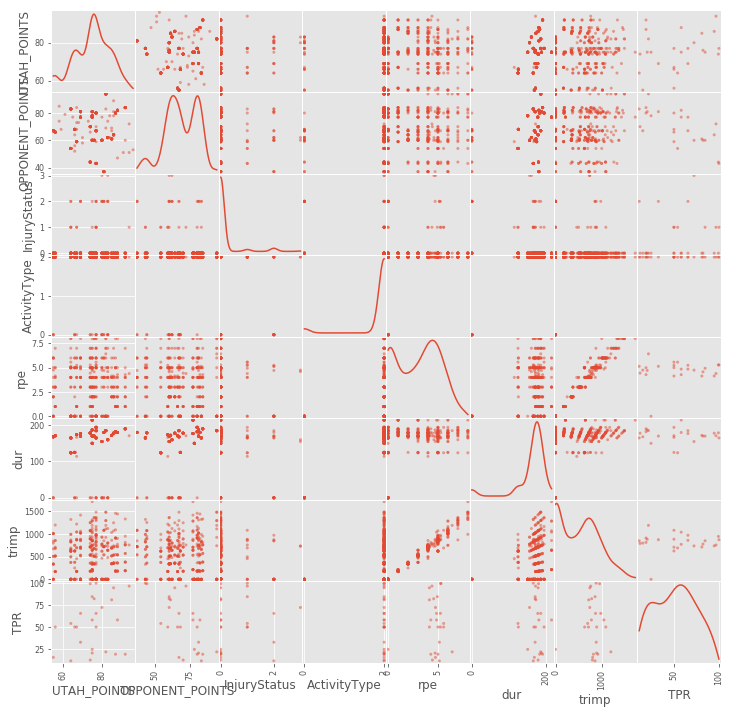

In [61]:
pd.plotting.scatter_matrix(Complete_data, figsize=(12, 12), diagonal='kde')

In [39]:
Complete_data.corr()

,UTAH_POINTS,OPPONENT_POINTS,InjuryStatus,ActivityType,rpe,dur,trimp,TPR
UTAH_POINTS,1.000000,0.074992,0.036707,0.023990,0.037727,0.187689,0.073761,0.272969
OPPONENT_POINTS,0.074992,1.000000,-0.087837,0.129267,-0.074124,0.255389,-0.060214,-0.685574
InjuryStatus,0.036707,-0.087837,1.000000,-0.413770,-0.086542,-0.397609,-0.097887,0.111404
ActivityType,0.023990,0.129267,-0.413770,1.000000,0.330703,0.901657,0.278399,NaN
rpe,0.037727,-0.074124,-0.086542,0.330703,1.000000,0.301763,0.983208,0.094773
dur,0.187689,0.255389,-0.397609,0.901657,0.301763,1.000000,0.338205,-0.051074
trimp,0.073761,-0.060214,-0.097887,0.278399,0.983208,0.338205,1.000000,0.044917
TPR,0.272969,-0.685574,0.111404,NaN,0.094773,-0.051074,0.044917,1.000000


Text(0,0.5,'TPR')

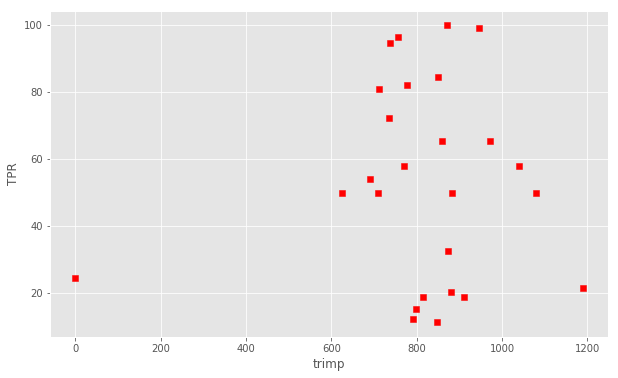

In [49]:
plt.scatter(x=Complete_team_data.loc[:,'trimp'],y=Complete_team_data.loc[:,'TPR'],c='r',marker='s')

plt.xlabel('trimp')
plt.ylabel('TPR')

In [67]:
sm.ols(formula="TPR ~ trimp+rpe+dur", data=Complete_team_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TPR   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                 -0.101
Method:                 Least Squares   F-statistic:                    0.2347
Date:                Sat, 31 Mar 2018   Prob (F-statistic):              0.871
Time:                        12:06:23   Log-Likelihood:                -123.95
No. Observations:                  26   AIC:                             255.9
Df Residuals:                      22   BIC:                             260.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -143.1442    325.188     -0.440      0.664    -817.542     531.254
trimp         -0.2579      0.409     -0.630      0.535      -1.107       0.591
rpe           43.0740     64.078      0.672      0.508     -89.815     175.963
dur            1.1843      2.075      0.571      0.574      -3.119       5.488
==============================================================================
Omnibus:                        3.829   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.147   Jarque-Bera (JB):                1.494
Skew:                           0.063   Prob(JB):                        0.474
Kurtosis:                       1.833   Cond. No.                     4.67e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
sm.ols(formula="TPR ~ Opponent+trimp+Win_Or_Lose+rpe+dur", data=Complete_team_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TPR   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2.844
Date:                Sat, 31 Mar 2018   Prob (F-statistic):             0.0999
Time:                        12:02:52   Log-Likelihood:                -94.419
No. Observations:                  26   AIC:                             228.8
Df Residuals:                       6   BIC:                             254.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             -119.1869    253.743     -0.470      0.655    -740.073     501.699
Opponent[T.Arizona State]              -10.5000     22.205     -0.473      0.653     -64.834      43.834
Opponent[T.Butler]                      -1.1795     23.957     -0.049      0.962     -59.800      57.441
Opponent[T.Colorado]                   -10.8861     20.770     -0.524      0.619     -61.710      39.937
Opponent[T.Hawaii]                      -4.6511     26.740     -0.174      0.868     -70.081      60.778
Opponent[T.Montana State]              -72.9658     32.846     -2.221      0.068    -153.338       7.406
Opponent[T.Northwest Nazarene]       -1.818e-13   4.75e-13     -0.383      0.715   -1.34e-12    9.81e-13
Opponent[T.Oregon]                      33.1322     32.550      1.018      0.348     -46.514     112.779
Opponent[T.Prairie View]              2.168e-14   7.13e-14      0.304      0.771   -1.53e-13    1.96e-13
Opponent[T.Stanford]                   -16.2093     20.140     -0.805      0.452     -65.491      33.072
Opponent[T.UCLA]                       -20.5919     24.423     -0.843      0.431     -80.352      39.168
Opponent[T.USC]                          7.9625     30.732      0.259      0.804     -67.236      83.162
Opponent[T.University of California]    11.9099     20.876      0.571      0.589     -39.171      62.991
Opponent[T.Utah State]                 -22.7761     28.945     -0.787      0.461     -93.603      48.051
Opponent[T.Utah Valley]                -68.4989     28.824     -2.376      0.055    -139.029       2.031
Opponent[T.Washington]                   5.3905     25.686      0.210      0.841     -57.461      68.242
Opponent[T.Washington State]           -74.0387     29.663     -2.496      0.047    -146.621      -1.457
Opponent[T.Xavier]                      28.8855     24.068      1.200      0.275     -30.007      87.778
Win_Or_Lose[T.W]                        49.1036     15.564      3.155      0.020      11.019      87.188
trimp                                   -0.1040      0.338     -0.308      0.768      -0.931       0.722
rpe                                     17.7522     53.457      0.332      0.751    -113.052     148.557
dur                                      0.8986      1.654      0.543      0.606      -3.148       4.945
==============================================================================
Omnibus:                        0.846   Durbin-Watson:                   2.427
Prob(Omnibus):                  0.655   Jarque-Bera (JB):                0.236
Skew:                           0.218   Prob(JB):                        0.889
Kurtosis:                       3.163   Cond. No.                     8.20e+19
===============================================================

#### Influence of Injury status on the team overall performance

Text(0,0.5,'TPR')

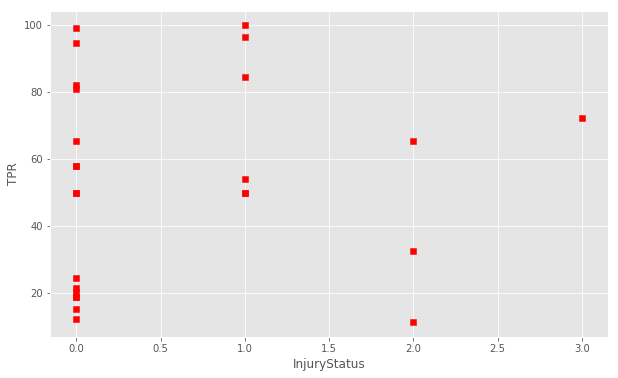

In [55]:
plt.scatter(x=Complete_team_data.loc[:,'InjuryStatus'],y=Complete_team_data.loc[:,'TPR'],c='r',marker='s')

plt.xlabel('InjuryStatus')
plt.ylabel('TPR')

In [56]:
sm.ols(formula="TPR ~ InjuryStatus", data=Complete_team_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TPR   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.3016
Date:                Sat, 31 Mar 2018   Prob (F-statistic):              0.588
Time:                        11:42:55   Log-Likelihood:                -124.20
No. Observations:                  26   AIC:                             252.4
Df Residuals:                      24   BIC:                             254.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       51.1940      7.114      7.196      0.000      36.512      65.876
InjuryStatus     3.8337      6.981      0.549      0.588     -10.574      18.241
==============================================================================
Omnibus:                        4.113   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                1.577
Skew:                           0.120   Prob(JB):                        0.455
Kurtosis:                       1.818   Cond. No.                         1.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""